## Partie 1 : PageRank - version itérative, premier exemple

##### 1. Justifier pourquoi l’algorithme de la puissance iterérée permet de calculer le score de chacune des pages. 

Dans un premier temps il faut que la matrice symbolysant le web soit une matrice stochastique, c'est une matrice de probabilité ou la somme de chaque colonne doit être égal à 1, elle traduit la probabilité de se rendre sur une autre page depuis la page courante. En appliquant l'algorythme de puissance itértée sur celle-ci on obtient des vecteurs propre pour chaque point de la matrice. Ces vecteurs nous donne la probabilité de se retrouvé sur une page apres tant d'itération. Plus sa valeur est grande plus la page est fréquemment visité au cour des itérations.    



In [2]:
from random import randint
import numpy as np
from math import sqrt

In [3]:
#fonction pour la norme
def norme(X:np.array):
    sum = 0 
    for x in X:
        sum += x**2
    return np.sqrt(sum)

V = np.array([2,0,0,3])
print(norme(V))

3.605551275463989


In [ ]:

def puissanceItere(l,A:np.array):
   """Fonction qui applique l'algorithme de puissance itérée sur une matrice. 
   Matrice de toutes tailles, stochastique ou non"""
   X = np.array([randint(1,10) for x in range (A.shape[0])])
   Lambda = 0
   while (True):
       aLambda = Lambda
       AX = np.dot(A,X) # approximation du vecteur propre associé
       Lambda = norme(AX) # approximation de lambda
       X = AX / Lambda
       if (abs(Lambda - aLambda) < l ):
           return X,Lambda


C2 = np.array([[2, 3], [1, 0]])
X, Lambda = puissanceItere(1e-6, C2)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)
print("--------------------------------------")
C3 = np.array([[4,1,0], [1,3,1], [0,1,2]])
X, Lambda = puissanceItere(1e-6, C3)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)
print("--------------------------------------")
C4 = np.array([[4, 1, 0, 0],[1, 3, 1, 0],[0, 1, 2, 1],[0, 0, 1, 1]])
X, Lambda = puissanceItere(1e-6, C4)
print("Vecteur propre approximé :", X)
print("Valeur propre approximée :", Lambda)

Vecteur propre approximé : [0.94868329 0.31622778]
Valeur propre approximée : 2.999999907077707
--------------------------------------
Vecteur propre approximé : [0.78842354 0.57760174 0.21157637]
Valeur propre approximée : 4.732050139370267
--------------------------------------
Vecteur propre approximé : [0.77819102 0.57959393 0.23367394 0.06233864]
Valeur propre approximée : 4.745280688519943
Help on function puissanceItere in module __main__:

puissanceItere(l, A: <built-in function array>)
    Fonction qui applique l'algorithme de puissance itérée sur une matrice. 
    Matrice de toutes tailles, stochastique ou non



##### 2. Implementer cet algorithme pour calculer le score de chacune des pages du graphe precedent. On verifiera que le vecteur de score obtenu est bien approximativement solution de r = Qr.


In [71]:
def score(C:np.array,precision):
    sum_col = C.sum(axis=0)
    sum_col[sum_col == 0] = 1
    Q = C/sum_col
    r = np.array([1/C.shape[0] for i in range(C.shape[0])])
    while (True):
        r_nouv = r
        r = np.dot(Q,r) # approximation du vecteur propre associé
        if ( np.allclose(r_nouv, r, atol=precision)):
            return r_nouv
        


C = np.array([
    [0,1,1,1,1,0,1,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,1,0,0,0,0,0,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,0,0,1,0,1,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,1,0,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,1,0,1,1,1,1],
    [0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,0,0],
    [0,0,0,0,0,0,0,0,0,1,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,1,1,0,1,0]
])

t = score (C,1e-6)
sum = 0 
for i in range (len(t)):
    print (i+1,": ",t[i])
    sum += t[i]
print("somme ",sum)

1 :  0.12984403106662662
2 :  0.02596838184008328
3 :  0.034624356162225214
4 :  0.08078837342005901
5 :  0.0750177417640923
6 :  0.15584751009697317
7 :  0.05194926089129692
8 :  0.10389862001658065
9 :  0.05194926089129692
10 :  0.1298991587937131
11 :  0.02598030380090678
12 :  0.03464057520938561
13 :  0.04330093860595845
14 :  0.056291487440802375
somme  1.0000000000000004


##### 3. Analyser la pertinence du resultat obtenu.
Pour verifier mes resultats, étant donné que les vecteurs obtenue traduisent une probabilité il faut que la somme global soit d'environ 1. C'est le cas ce qui me laisse penser que les resultats sont corrects.
Ici on obtient le score de chaque noeuds (pages), on voit que le noeud 6 est celui avec le meilleur score ce sera donc la page la mieux classé par PageRank. Elle a le meilleur score car elle est celle vers qui les liens pointe le plus. L'importance de ses enfants lui donne la plus grand importance global.

## Partie 2 : PageRank - version itérative, deuxième exemple

##### 1. Appliquer l’algorithme de la Partie 1 au graphe suivant et commenter le resultat obtenu
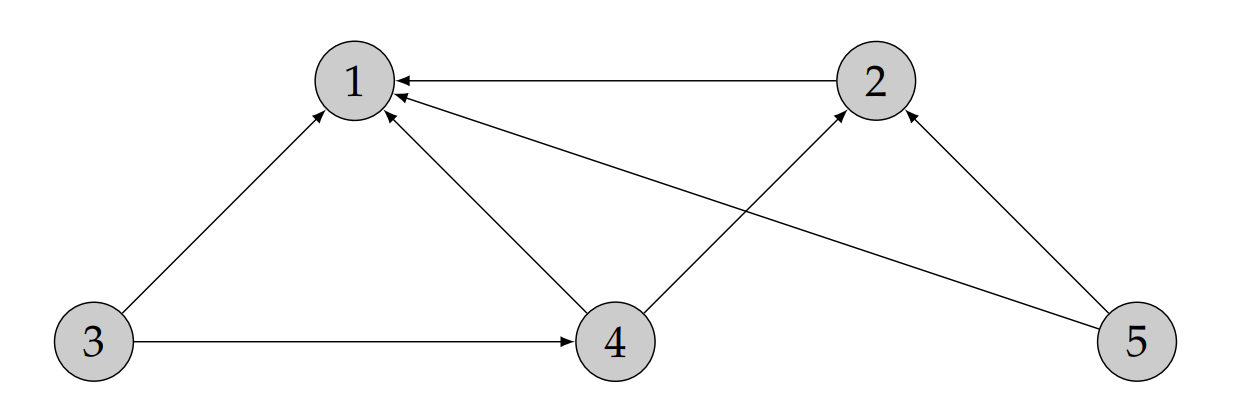


In [74]:
B = np.array([
    [0,1,1,1,1],
    [0,0,0,1,1],
    [0,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0]
])

b = score (B,1e-6)
sum = 0 
for i in range (len(b)):
    print (i+1,": ",b[i])
    sum += b[i]
print("somme ",sum)

1 :  0.0
2 :  0.0
3 :  0.0
4 :  0.0
5 :  0.0
somme  0.0
